## Plotting the longer trajectories


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

um_per_pixel = 0.117

In [82]:
df_combined = pd.read_csv(r'Z:\Bisal_Halder_turbo\PROCESSED_DATA\Trial_analysis\Noco\2x_alpha and D\20240116_UGD-2x-2s-replicate1-FOV-1_alpha_and_D_w5.csv')
df_combined[['TRACK_ID', 'POSITION_X', 'POSITION_Y', 'POSITION_T', 'alpha' ]]


,TRACK_ID,POSITION_X,POSITION_Y,POSITION_T,alpha
0,0.0,276.695698,130.852165,0.0,NaN
1,0.0,276.709078,130.967388,2.0,NaN
2,0.0,276.638097,131.113983,4.0,NaN
3,0.0,276.420250,131.124818,6.0,NaN
4,0.0,277.077961,130.904499,8.0,1.53122
...,...,...,...,...,...
173963,999.0,32.438872,480.296811,46.0,NaN
173964,999.0,32.468679,480.236605,48.0,NaN
173965,NaN,NaN,NaN,NaN,NaN
173966,NaN,NaN,NaN,NaN,NaN


In [83]:
df_combined['POSITION_X'] = df_combined['POSITION_X'] * um_per_pixel
df_combined['POSITION_Y'] = df_combined['POSITION_Y'] * um_per_pixel
df_combined[['TRACK_ID', 'POSITION_X', 'POSITION_Y', 'POSITION_T', 'alpha' ]]



,TRACK_ID,POSITION_X,POSITION_Y,POSITION_T,alpha
0,0.0,32.373397,15.309703,0.0,NaN
1,0.0,32.374962,15.323184,2.0,NaN
2,0.0,32.366657,15.340336,4.0,NaN
3,0.0,32.341169,15.341604,6.0,NaN
4,0.0,32.418121,15.315826,8.0,1.53122
...,...,...,...,...,...
173963,999.0,3.795348,56.194727,46.0,NaN
173964,999.0,3.798835,56.187683,48.0,NaN
173965,NaN,NaN,NaN,NaN,NaN
173966,NaN,NaN,NaN,NaN,NaN


Track ID 433.0 data:
       TRACK_ID  POSITION_X  POSITION_Y  POSITION_T     alpha
82042     433.0   36.944925   38.976974         0.0       NaN
82043     433.0   36.938721   38.957744         2.0       NaN
82044     433.0   36.952812   38.931790         4.0       NaN
82045     433.0   36.938606   38.961587         6.0       NaN
82046     433.0   36.898802   38.939389         8.0  0.949634
...         ...         ...         ...         ...       ...
82206     433.0   36.607991   38.497862       328.0  1.512257
82207     433.0   36.591452   38.442425       330.0       NaN
82208     433.0   36.623557   38.377829       332.0       NaN
82209     433.0   36.657898   38.284629       334.0       NaN
82210     433.0   36.814551   38.249924       336.0       NaN

[169 rows x 5 columns]



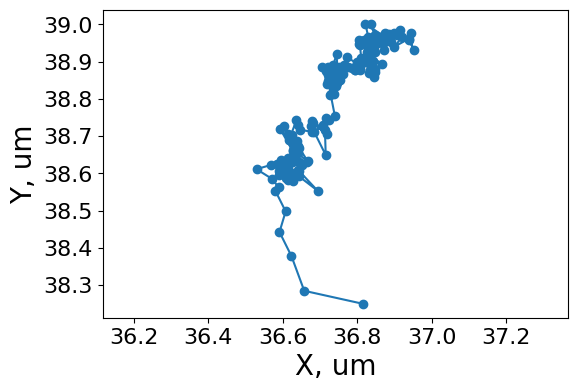

In [96]:
alpha_threshold = 1.5
min_windows = 5

trajectory_counts = df_combined [df_combined['alpha'] > alpha_threshold].groupby('TRACK_ID')['alpha'].count()
valid_trajectories = trajectory_counts [trajectory_counts > min_windows].index
num_trajectories_to_select = 1
selected_trajectories = np.random.choice (valid_trajectories, size = num_trajectories_to_select)
plt.figure (figsize = (6, 4))
for track_id in selected_trajectories:
    track_data = df_combined [df_combined ['TRACK_ID'] == track_id]

    print (f'Track ID {track_id} data:')
    print (track_data [['TRACK_ID', 'POSITION_X', 'POSITION_Y', 'POSITION_T', 'alpha']])
    print ()

    plt.plot (track_data ['POSITION_X'], track_data ['POSITION_Y'], marker = 'o')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axis('equal')
plt.xlabel('X, um', fontsize=20)
plt.ylabel('Y, um', fontsize = 20)
plt.show()

    